In [ ]:
#import necessary libraries
import tweepy
from textblob import TextBlob


In [ ]:
#Retrieving tweets from twitter 
consumer_key='CbbklaZ4A7iOmpo9ZfsYFuWxU'
consumer_key_secret='RwR6OI6WVJag84B1NIk6OPCd2vv2EwFiBKpU7exePcPIDxWUZc'
access_token='1282233149594800128-kNp1ZvypJxDLjT4A0kOKW2QjZnnBMh'
access_token_secret='MjvpVkdhg5MdROIMFSBDsJt0dH6a0jQFHEFKFQp2LAArb'
auth=tweepy.OAuthHandler(consumer_key,consumer_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)


public_tweets=api.search('COVID-19',lang="en",count=100)
for tweet in public_tweets:
  
  print(tweet.created_at)
  print(tweet.text)
  analysis=TextBlob(tweet.text)
  print(analysis.sentiment)
  if analysis.sentiment[0]>0:
    print("Positive")
  elif analysis.sentiment[0]<0:
    print("Negative")
  else:
    print("Neutral")

2020-07-15 17:22:11
RT @miles_commodore: One person under 18 has died due to COVID-19 in New Jersey.

Why would anyone be concerned about the safety of their k…
Sentiment(polarity=0.005681818181818177, subjectivity=0.4147727272727273)
Positive
2020-07-15 17:22:10
@MollyJongFast In commemoration of this event we are renaming this strain of Covid-19, #Elon19.
Sentiment(polarity=0.0, subjectivity=0.0)
Neutral
2020-07-15 17:22:10
RT @leelynkids: 31% of children tested for COVID-19 in Florida have been positive, state data shows #SmartNews     But let’s open schools ⁦…
Sentiment(polarity=0.11363636363636363, subjectivity=0.5227272727272727)
Positive
2020-07-15 17:22:10
RT @Respexy: If you won't wear a mask in the store to protect other people from COVID-19, I had better not EVER hear you saying that a 14 y…
Sentiment(polarity=0.1875, subjectivity=0.4375)
Positive
2020-07-15 17:22:10
RT @JaniceDean: “Sorry: Washington didn’t force New York nursing homes to admit 6,300 COVID-positive patients

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)
import re
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
i=1
for tweet in public_tweets[0:5]:
  print(str(i)+') '+ tweet.text+'\n')
  i=i+1
df=pd.DataFrame([tweet.text for tweet in public_tweets],columns=['Tweets'])
df['Date']=pd.DataFrame([tweet.created_at for tweet in public_tweets],columns=['Date'])
df.head()

1) RT @miles_commodore: One person under 18 has died due to COVID-19 in New Jersey.

Why would anyone be concerned about the safety of their k…

2) @MollyJongFast In commemoration of this event we are renaming this strain of Covid-19, #Elon19.

3) RT @leelynkids: 31% of children tested for COVID-19 in Florida have been positive, state data shows #SmartNews     But let’s open schools ⁦…

4) RT @Respexy: If you won't wear a mask in the store to protect other people from COVID-19, I had better not EVER hear you saying that a 14 y…

5) RT @JaniceDean: “Sorry: Washington didn’t force New York nursing homes to admit 6,300 COVID-positive patients. ⁦@NYGovCuomo⁩ and his health…



,Tweets,Date
0,RT @miles_commodore: One person under 18 has d...,2020-07-15 17:22:11
1,@MollyJongFast In commemoration of this event ...,2020-07-15 17:22:10
2,RT @leelynkids: 31% of children tested for COV...,2020-07-15 17:22:10
3,RT @Respexy: If you won't wear a mask in the s...,2020-07-15 17:22:10
4,RT @JaniceDean: “Sorry: Washington didn’t forc...,2020-07-15 17:22:10


In [ ]:
for i in range(df.shape[0]) :
    df['Tweets'][i] = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(#[A-Za-z0-9]+)", " ", df['Tweets'][i]).split()).lower()
df['Tweets'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    rt commodore one person under 18 has died due ...
1    in commemoration of this event we are renaming...
2    rt 31 of children tested for covid 19 in flori...
3    rt if you won t wear a mask in the store to pr...
4    rt sorry washington didn t force new york nurs...
Name: Tweets, dtype: object

In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity']=df['Tweets'].apply(getSubjectivity)
df['Polarity']=df['Tweets'].apply(getPolarity)
df

,Tweets,Date,Subjectivity,Polarity
0,rt commodore one person under 18 has died due ...,2020-07-15 17:22:11,0.414773,0.005682
1,in commemoration of this event we are renaming...,2020-07-15 17:22:10,0.000000,0.000000
2,rt 31 of children tested for covid 19 in flori...,2020-07-15 17:22:10,0.522727,0.113636
3,rt if you won t wear a mask in the store to pr...,2020-07-15 17:22:10,0.437500,0.187500
4,rt sorry washington didn t force new york nurs...,2020-07-15 17:22:10,0.666667,-0.045455
...,...,...,...,...
95,rt ayawaso west wuogon municipality is greater...,2020-07-15 17:22:05,0.484848,0.378788
96,rt breaking florida has passed 300 000 cases o...,2020-07-15 17:22:05,0.454545,0.136364
97,6200 people attend trumprally on june 20th tru...,2020-07-15 17:22:05,0.188889,0.177778
98,rt according to a walt disney insider covid19 ...,2020-07-15 17:22:05,0.000000,0.000000


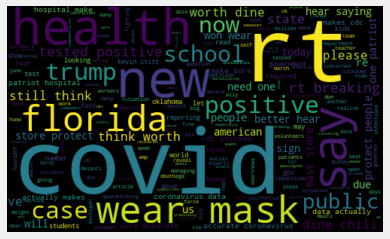

In [ ]:
allWords=' '.join([twts for twts in df['Tweets']])
wordCloud=WordCloud(width=500,height=300,random_state=21,max_font_size=119).generate(allWords)
plt.imshow(wordCloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Sentiment Analysis
def getAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis']=df['Polarity'].apply(getAnalysis)
df

,Tweets,Date,Subjectivity,Polarity,Analysis
0,rt commodore one person under 18 has died due ...,2020-07-15 17:22:11,0.414773,0.005682,Positive
1,in commemoration of this event we are renaming...,2020-07-15 17:22:10,0.000000,0.000000,Neutral
2,rt 31 of children tested for covid 19 in flori...,2020-07-15 17:22:10,0.522727,0.113636,Positive
3,rt if you won t wear a mask in the store to pr...,2020-07-15 17:22:10,0.437500,0.187500,Positive
4,rt sorry washington didn t force new york nurs...,2020-07-15 17:22:10,0.666667,-0.045455,Negative
...,...,...,...,...,...
95,rt ayawaso west wuogon municipality is greater...,2020-07-15 17:22:05,0.484848,0.378788,Positive
96,rt breaking florida has passed 300 000 cases o...,2020-07-15 17:22:05,0.454545,0.136364,Positive
97,6200 people attend trumprally on june 20th tru...,2020-07-15 17:22:05,0.188889,0.177778,Positive
98,rt according to a walt disney insider covid19 ...,2020-07-15 17:22:05,0.000000,0.000000,Neutral


In [ ]:
#print all the positive tweets
j=1
sortedDF=df.sort_values(by=['Polarity'])
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Positive'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) rt commodore one person under 18 has died due to covid 19 in new jersey why would anyone be concerned about the safety of their k

2) rt 31 of children tested for covid 19 in florida have been positive state data shows smartnews but let s open schools

3) rt if you won t wear a mask in the store to protect other people from covid 19 i had better not ever hear you saying that a 14 y

4) rt please watch this especially if you ve tested positive for covid 19 and have recovered

5) rt stunning texas coronavirus numbers show covid 19 less lethal than last two flu seasons

6) rt 21 volunteers of the the lebanese red cross have tested positive today for covid 19 thank you for your sacrifices and qui

7) rt this is what covid 19 does to you still think it s worth it to dine in at chili s

8) just like he has to do another turn when his own dad did the opposite of what he was telling every el

9) scientific and public health experts including the trusted dr anthony fauci are vital to combati

In [ ]:
#print all the negative values
j=1
sortedDF=df.sort_values(by=['Polarity'],ascending='False')
for i in range(0,sortedDF.shape[0]):
  if(sortedDF['Analysis'][i]=='Negative'):
    print(str(j)+') '+sortedDF['Tweets'][i])
    print()
    j=j+1

1) rt sorry washington didn t force new york nursing homes to admit 6 300 covid positive patients and his health

2) rt i ve been fighting covid 19 this week it s been tough but i m managing and self quarantining please wear masks pleas

3) rt so if covid 19 required schools to close in march and it s worse now why are we talking about reopening

4) it is grotesque that cuomo would do thi

5) rt imagine during this covid 19 lockdown that people are losing weight due to hunger this gecko is my house is adding weight

6) rt us fascist regime hides the massive death toll of covid 19 which has ravaged black and brown communities due to genocidal

7) rt please sign this petition their living conditions are inhumane and they re being cut off from the outside world https

8) rt republicans realize that covid 19 is so dangerous they ve decided to move their convention outdoors but they want our ki

9) rt the experts say we need 70 80 of the population to get covid 19 to achieve herd immunity l

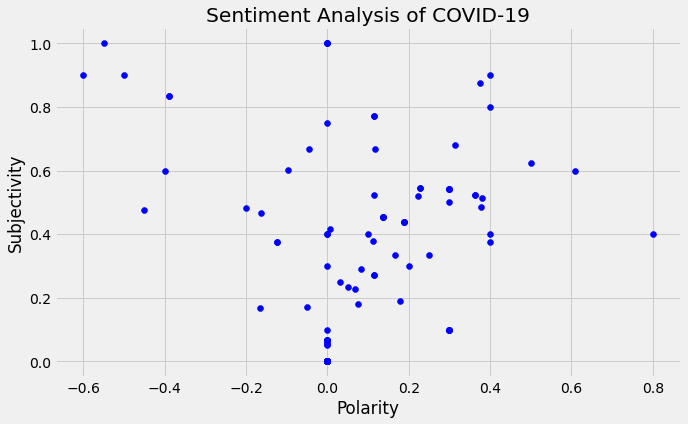

In [ ]:
#Plot the Polarity and Subjectivity
plt.figure(figsize=(10,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis of COVID-19')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#percentage of positive comments
ptweets=df[df.Analysis=='Positive']
ptweets=ptweets['Tweets']
round((ptweets.shape[0]/df.shape[0])*100,1)

52.0

In [ ]:
#percentage of negative comments
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']
round((ntweets.shape[0]/df.shape[0])*100,1)


15.0

In [ ]:
#percentage of neutral comments
neutweets=df[df.Analysis=='Neutral']
neutweets=neutweets['Tweets']
round((neutweets.shape[0]/df.shape[0])*100,1)

33.0

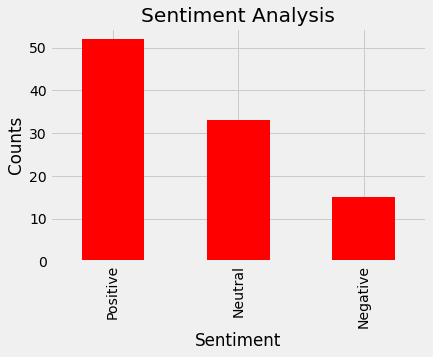

In [ ]:
#show the value counts
df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar',color='red')
plt.show()

Text(0.5, 1.0, 'No. of Tweets per Hour')

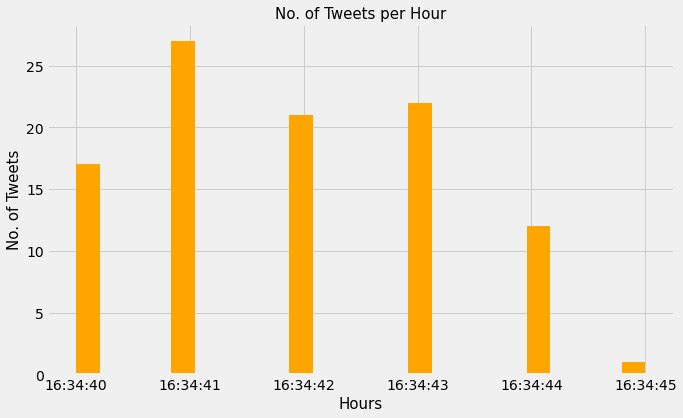

In [ ]:
#Number of tweets per hour
plt.figure(1, figsize=(10,6))
plt.hist(df["Date"],bins = 24,color='orange');
plt.xlabel('Hours',size = 15)
plt.ylabel('No. of Tweets',size = 15)
plt.title('No. of Tweets per Hour',size = 15)

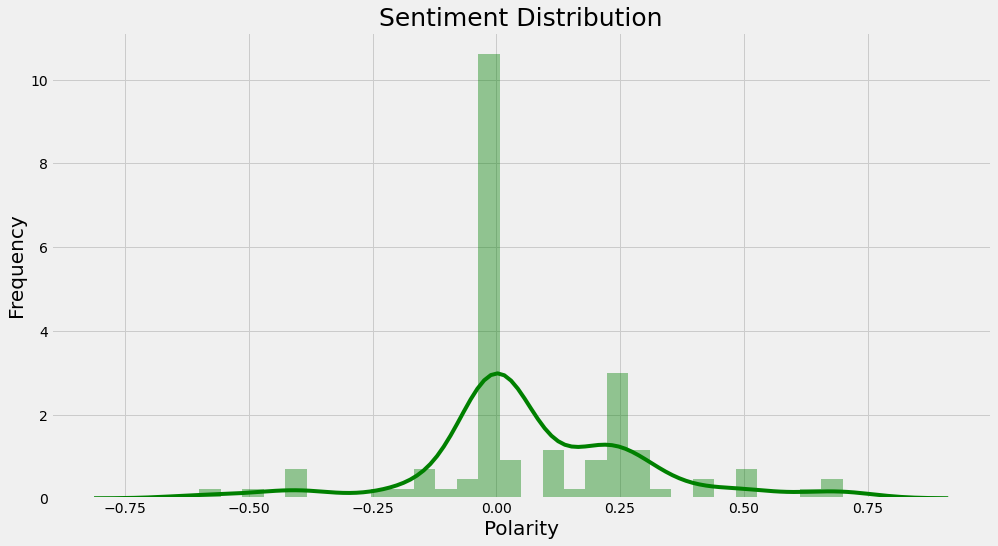

In [ ]:
#Sentiment Distribution
import seaborn as sns
plt.figure(figsize=(15,8))
sns.distplot(df['Polarity'], bins=30,color='green')
plt.title('Sentiment Distribution',size = 25)
plt.xlabel('Polarity',size = 20)
plt.ylabel('Frequency',size = 20)
plt.show();

In [ ]:
#list of stopwords
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 'ours',
 '

In [ ]:
#Removing Stop Words
df['Tweets'] = df['Tweets'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word.lower() not in stopwords]))
df['Tweets']

0     rt breaking oklahoma gov kevin stitt confirms ...
1      rt covid 19 vaccines treatments must free period
2     rt oxford s covid 19 vaccine devised sarah gil...
3     rt oklahoma governor kevin stitt republican al...
4     rt heads raising canes costa mesa employee tes...
                            ...                        
95    starting 12th july armed forces armenia attack...
96             mr president top guy cdc don t know name
97    rt future children grandchildren history class...
98    rt oklahoma s governor tested positive covid 1...
99    rt please everyone send positive thoughts came...
Name: Tweets, Length: 100, dtype: object

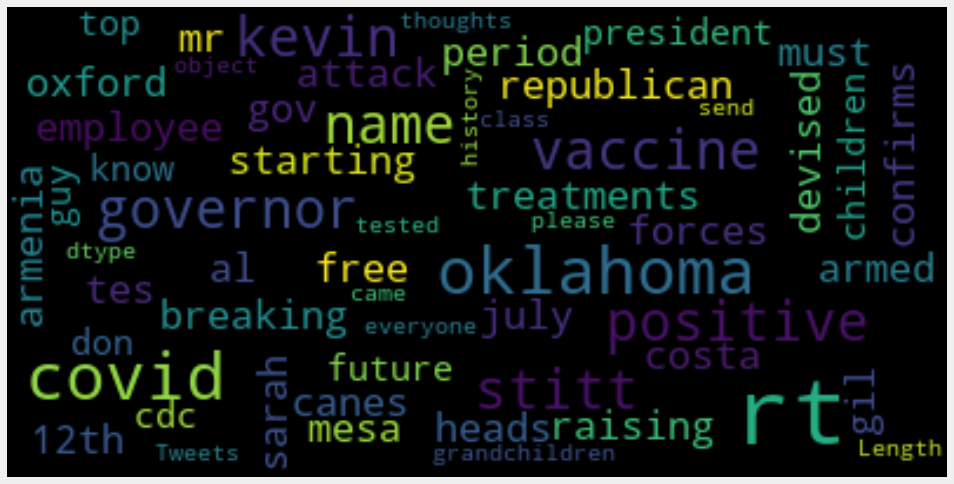

In [ ]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(df['Tweets'])

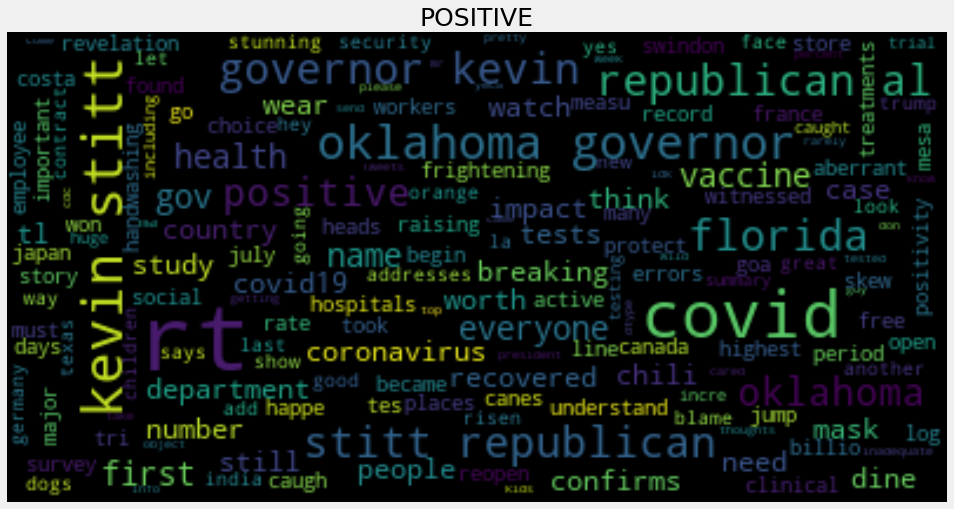

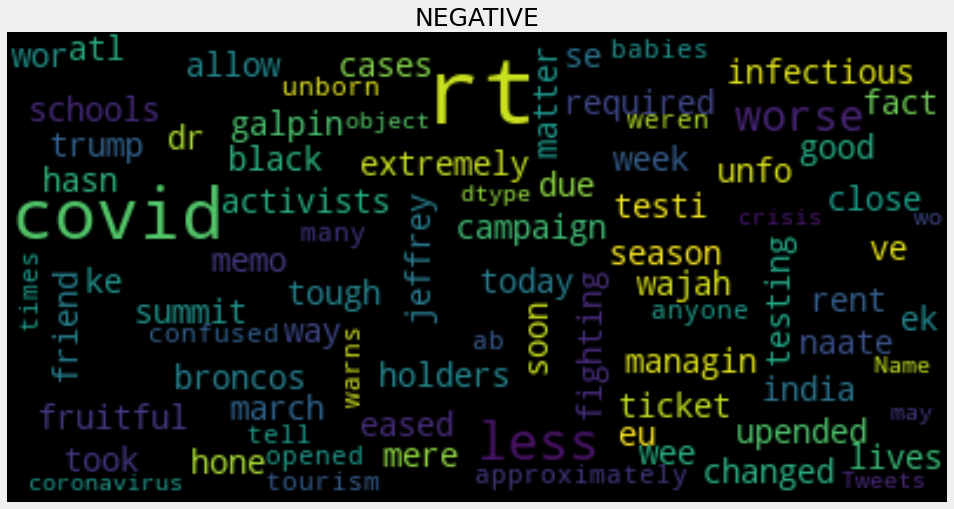

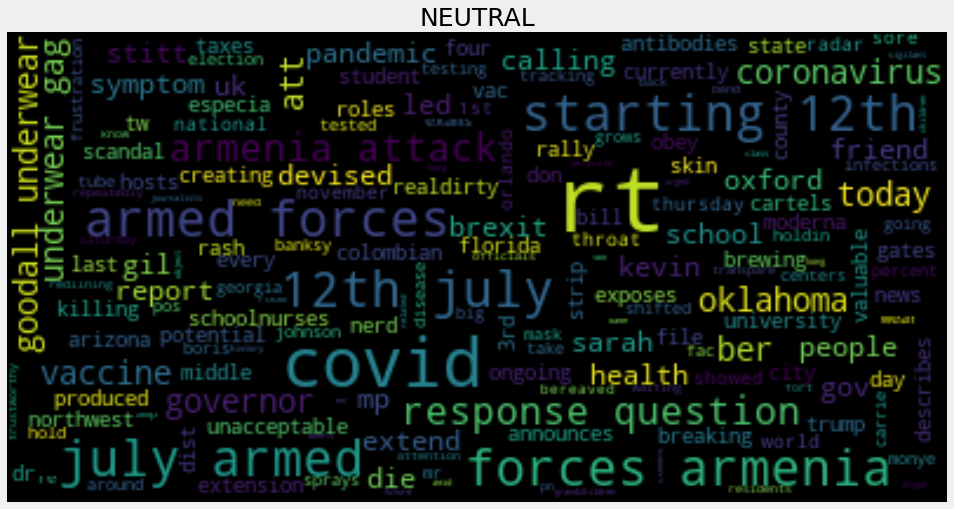

In [ ]:
#Using Word Clouds to see the higher frequency words from each sentiment

pos = df['Tweets'][df['Analysis'] == 'Positive']
show_wordcloud(pos , 'POSITIVE')

neg = df['Tweets'][df['Analysis'] == 'Negative']
show_wordcloud(neg , 'NEGATIVE')

neutral = df['Tweets'][df['Analysis'] == 'Neutral']
show_wordcloud(neutral , 'NEUTRAL')

In [ ]:
#Removing stopwords and counting the occurence of frequently repeated words
import collections
from collections import Counter
df['Tweets'] = df['Tweets'].apply(lambda tweets: ' '.join([word for word in tweets.split() if word.lower() not in stopwords]))

words = []

words = [word for i in df.Tweets for word in i.split()]

In [ ]:
freq = Counter(words).most_common(30)
freq = pd.DataFrame(freq)
freq.columns = ['word', 'frequency']
freq.head()

,word,frequency
0,rt,78
1,covid,62
2,19,61
3,s,23
4,positive,15


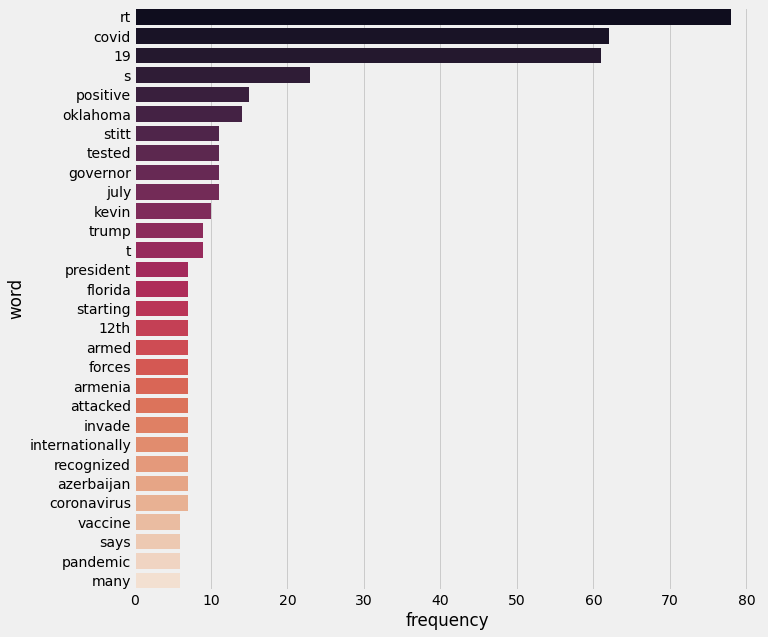

In [ ]:
plt.figure(figsize = (10, 10))
sns.barplot(y="word", x="frequency",data=freq,palette='rocket');

In [ ]:
# Bokeh Libraries
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
output_notebook()


In [ ]:

# create figure 
p = figure(plot_width = 1000, plot_height = 400,x_axis_label='Polarity',y_axis_label='Subjectivity',title='Sentiment Analysis') 
p.title.text_font_size = '20pt'
p.xaxis.axis_label_text_font_size = "20pt"
p.yaxis.axis_label_text_font_size = "20pt"
   
# add a line renderer 
p.hexbin(df['Polarity'],df['Subjectivity'], line_width = 5, color = "green",size=0.2, hover_color="pink", hover_alpha=0.8) 
  
# Show the plot
show(p)


In [ ]:
#create figure
p = figure(plot_width=1000, plot_height=400,x_axis_label='Date',title='Sentiment Analysis')
p.title.text_font_size = '20pt'
p.xaxis.axis_label_text_font_size = "20pt"

# add a circle renderer with a size, color, and alpha
p.circle(df['Date'], df['Polarity'], size=15, color="navy", alpha=0.5)
p.circle(df['Date'],df['Subjectivity'],size=15, color="orange", alpha=0.5)

# show the results
show(p)